In [26]:
%matplotlib inline
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


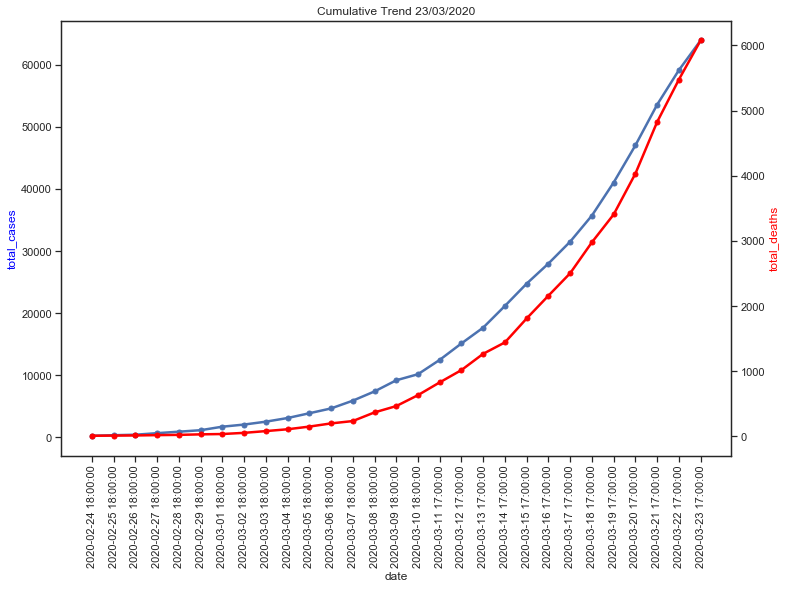

In [32]:
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8));
plt.title('Cumulative Trend 23/03/2020')
ax.plot(df['data'],df['totale_casi'],marker='.',markersize=10)
plt.xlabel('date')
plt.ylabel('total_cases',color='blue')
plt.xticks(df['data'], rotation='vertical')
ax2=ax.twinx()
ax2.plot(df['data'],df['deceduti'],marker='.',markersize=10,c='red')
ax2.set_ylabel('total_deaths',color='red')
plt.show()


Today:

In [28]:
c=pd.DataFrame(df.iloc[[-1],:])
c

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
28,2020-03-23 17:00:00,ITA,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468


Covid-19 ITALY/CHINA update

In [29]:
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df18=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',sep=',')

@interact
def scatter_plot(
                first_country=list(df18.Country.unique()), 
                 #first_country='China',
                 second_country=list(df18.Country.unique())[1:],
                 #second_country='Italy'
                ):
    country=[first_country,second_country]
    df1=df18.loc[(df18.Country.isin(country)),:]
    fig, ax = plt.subplots(figsize=(15,8));
    plt.xticks(rotation=90)
    sns.set(style="ticks", rc={"lines.linewidth": 2.5})
    g=sns.lineplot(data=df1, x='Date',y='Confirmed',hue='Country');
    plt.legend(loc='upper left', labels=['Cases in {} '.format(first_country) , 'Cases in {}'.format(second_country)])
    ax2=ax.twinx()
    g=sns.lineplot(data=df1, x='Date',y='Deaths',hue='Country',ax=ax2,dashes=True);
    for i in range(len(country)):
        g.lines[i].set_linestyle("--")
        plt.legend(loc='lower left', labels=['Death in {} '.format(first_country), 'Death in {}'.format(second_country)])
    for i in df1['Country'].unique():
        dd=df1[df1['Country']==i]
        death_rate=(dd.iloc[-1,4]/dd.iloc[-1,2])*100
        print('the death rate in {} is={} %'.format(i,death_rate));
        print('Total cases in {} are: {}'.format(i,dd.iloc[-1,2]));
        print('Total deaths in {} are: {}'.format(i,dd.iloc[-1,4]));
        

interactive(children=(Dropdown(description='first_country', options=('Afghanistan', 'Albania', 'Algeria', 'And…

Cases in Italy

In [30]:
dff=pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv',sep=',')
dff=dff.dropna()
import folium
import pandas as pd

m=folium.Map(width=600,height=600,
    location=[44.5075,11.3514],
    zoom_start=5)

data = pd.DataFrame({
   'lat':list(dff['lat']),
   'lon':list(dff['long']),
   'value':list(dff['totale_casi'])})
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      #popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*5,
      color='crimson',
      fill=False,
      #fill_color='crimson'
   ).add_to(m)

m

In [31]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')